## 01. Importing the Libraries 

In [71]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Libraries for Feature Processing 
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Libraries for modelling 
from sklearn.model_selection import  cross_val_score

from sklearn.pipeline import make_pipeline

# Other utilities
import warnings
warnings.filterwarnings(action='ignore')

## 02. Importing and Getting to Know the Data

In [3]:
# Importing the data 
from sklearn.datasets import  fetch_california_housing
housing = fetch_california_housing()

In [4]:
# print(housing.DESCR)
df = pd.DataFrame(housing.data,columns=housing.feature_names)
df['price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 03. EDA


### 3.1 Explore the Missingness in the data 

In [5]:
df.info()
# no missingness in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 3.2 Explore The Distribution in the Data 

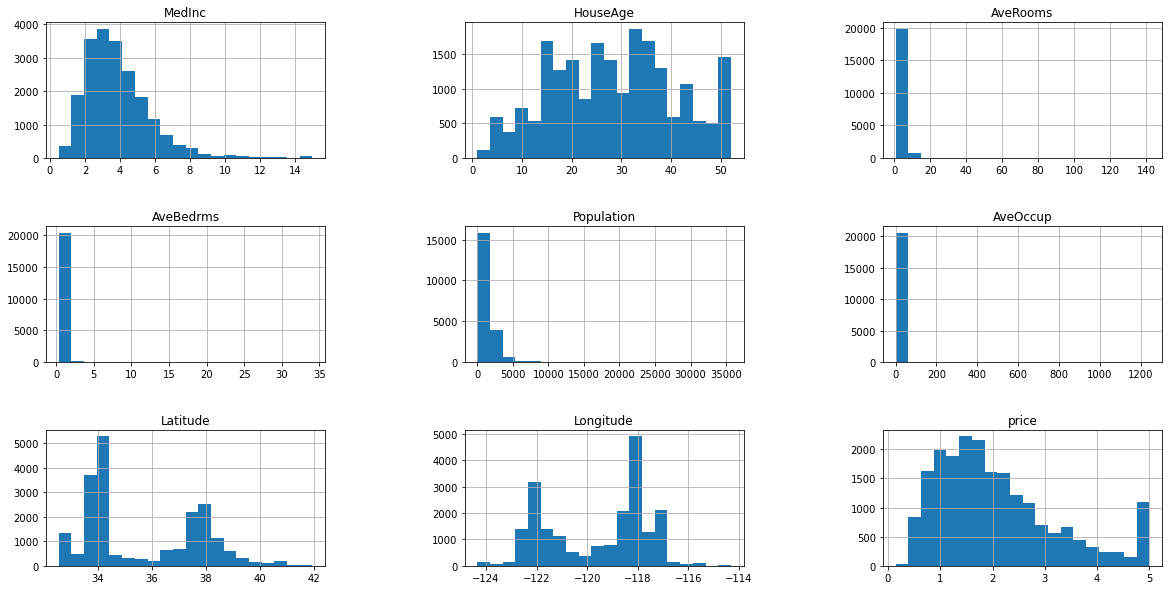

In [6]:
## distribution of the data 
df.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

### Insights 
- Median Income - Normnal Distribution 
- House Age - Uniform Distribution 
- AVG Rooms, Avg Bedroomms , Avg Occupants and Pop have a very large range and the data has unnoticable bins for the largest values (these can be considered as outliers)- subject to further testing. 

### 3.3 Explore Outliers 

![outliers](https://miro.medium.com/v2/resize:fit:1200/1*0MPDTLn8KoLApoFvI0P2vQ.png)

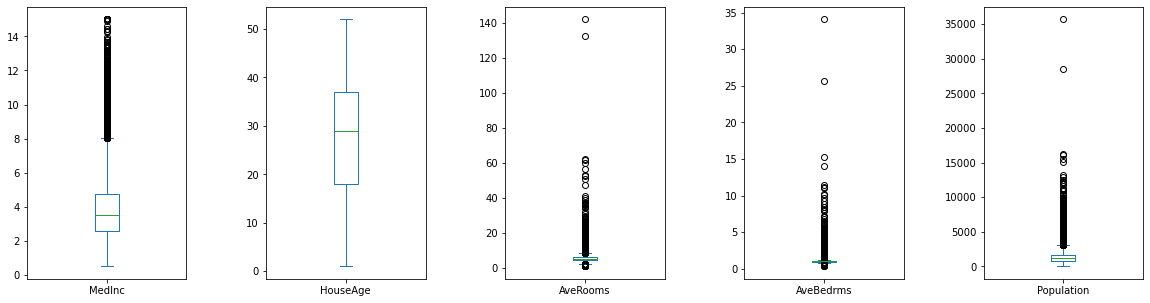

In [7]:
### Exploring outliers using box plots. 
cols=list (df.columns[:5])

# df[cols].boxplot()
## Create a fig and subplots 
# fig,axes = plt.subplots(ncols = len(cols))
# for i,j in zip(cols,axes):
#     sns.boxplot(df[i],ax=j)
#     j.set_title(i)

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1) 

# Use pandas plot() with parameters kind='box' and subplots=True like below. The parameter sharey is set to False by default. 
# It works along with sbuplots=True to isolate the y-axis for each column.

df[cols].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20,5)
)
plt.subplots_adjust(wspace=0.5) 

In [8]:
## Exloring outliers in an alternative way
df[cols].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744
std,1.899822,12.585558,2.474173,0.473911,1132.462122
min,0.499900,1.000000,0.846154,0.333333,3.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000


### Insights 
- Looking at the box plots and the difference between the max and the 75% values, we can see a huge difference for the numerical variables except for House Age. 
- This confirms our intuition of the existence of the extreme values. 

Text(0.5, 1.0, 'Median Price of a house depending on the spartial location')

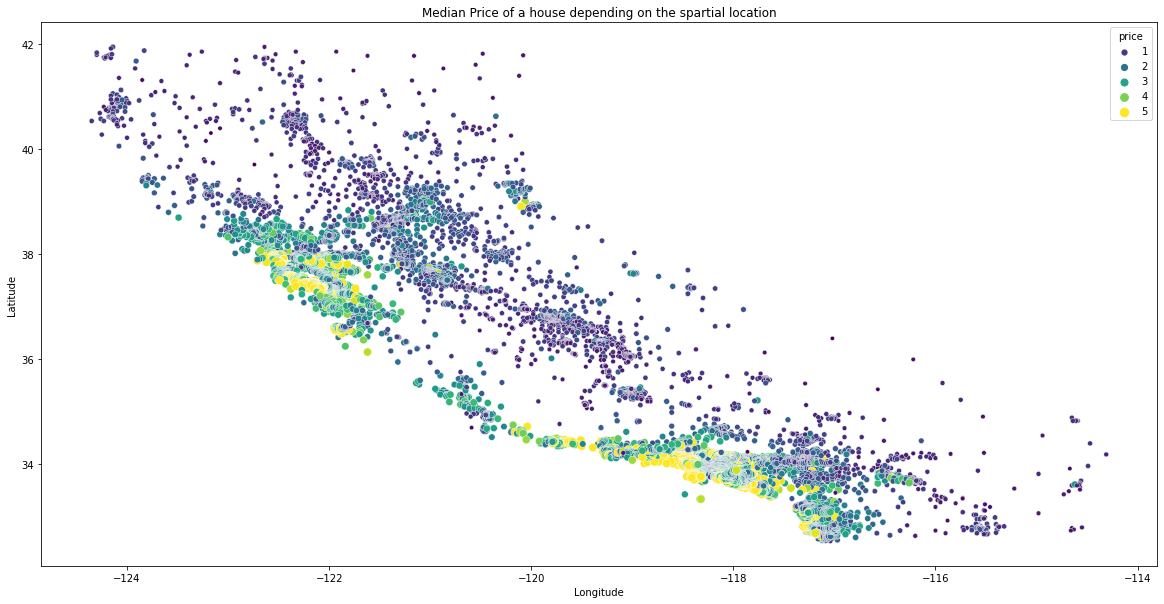

In [34]:
### Exploring latitude and Longitude 
plt.figure( figsize=(20,10))
sns.scatterplot(
    data = df,
    x = 'Longitude',
    y = 'Latitude',
    size = 'price',
    hue = 'price',
    palette ='viridis',
   
)
plt.title('Median Price of a house depending on the spartial location')

## Insights 
- Houses closer to the coast are more pricey than those on shore. This indicates that location data adds to the variability in pricing, hence we should incorporate it in our model. 

## 04. Data prep-processing 

In [50]:
# Scale the data 
scaler = RobustScaler()
X = scaler.fit_transform(df.drop(['price'],axis=1))
X = pd.DataFrame(X,columns=df.drop(['price'],axis=1).columns)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-0.986807
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-0.984169
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-0.989446
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-0.992084
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-0.992084


## 05. Modelling - Linear Regression

In [65]:
## Split the Data in Training and Testing Categorite - Train Test Split 
y = df.price
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

## Define Linear Reg Model 
reg_model= LinearRegression()
reg_model.fit(x_train,y_train)
y_pred = reg_model.predict(x_test)
r2_score(y_pred,y_test)
## Metric - the variability in the y variable that is explained by the model - the higher the better. The closer to 1 the better 100%


(14448, 8) (14448,) (6192, 8) (6192,)


0.3265165257430376

In [67]:
## Cross validated Modelling 
scores = cross_val_score(LinearRegression(),X,y,cv=5,scoring='r2')
print(scores,scores.mean())

[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406] 0.5530311140279565


In [82]:
## using pipleines 
pipe = make_pipeline(PolynomialFeatures(degree=1),Normalizer(),LinearRegression())
scores = cross_val_score(pipe,X,y,cv=5,scoring='r2')
print(scores,scores.mean())

[0.55181888 0.56814287 0.61517224 0.54270964 0.66948802] 0.5894663285523952


In [84]:
# Try another regression model 
from sklearn.ensemble import RandomForestRegressor
pipe = make_pipeline(PolynomialFeatures(degree=1),Normalizer(),RandomForestRegressor())
scores = cross_val_score(pipe,X,y,cv=5,scoring='r2')
print(scores,scores.mean())

[0.59786278 0.67937469 0.72757155 0.62027771 0.69114842] 0.6632470302307178
